In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn.datasets as ds
import seaborn as sns

#### dataset load
#### etl
#### define a regression model (hyperplane equation)
#### initialize the coefficients (weitghs and bias)
#### Define the cost function (error)
#### define the optimizers (with gradient descent model)

### train the model
### record the coefficients
### plot y_hat vs y

In [2]:
### atribute data to dependent and independent variables
x = ds.load_boston()["data"]
y = ds.load_boston()["target"]

In [3]:
### An integrate visualization of entire table
pd.merge(left= pd.DataFrame(x, columns = ds.load_boston()["feature_names"]), 
         right= pd.DataFrame(y, columns = ["PRICE"]),
         left_index=True, right_index=True)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


#### x are the inpedendent variables
#### y are the true LOG prices

In [4]:
### The x data are on a different scale range. Lets try to put everything on normalized (0,1) scale.
### For now lets try simple divide Xs by 100
from sklearn.preprocessing import Normalizer
x_norm = Normalizer().fit_transform(x[:,[0,2,4,5,6,7,9,10,11,12]])
x_norm

array([[1.26470559e-05, 4.62257897e-03, 1.07660064e-03, ...,
        3.06170815e-02, 7.94243113e-01, 9.96555985e-03],
       [5.78535081e-05, 1.49770891e-02, 9.93529671e-04, ...,
        3.77075227e-02, 8.40793020e-01, 1.93621774e-02],
       [5.85735343e-05, 1.51746020e-02, 1.00663201e-03, ...,
        3.82047970e-02, 8.43145529e-01, 8.64973775e-03],
       ...,
       [1.23766081e-04, 2.43010097e-02, 1.16718177e-03, ...,
        4.27762953e-02, 8.08471982e-01, 1.14884908e-02],
       [2.24645191e-04, 2.44549423e-02, 1.17457518e-03, ...,
        4.30472581e-02, 8.06521128e-01, 1.32831539e-02],
       [9.69216315e-05, 2.43888433e-02, 1.17140044e-03, ...,
        4.29309061e-02, 8.11394126e-01, 1.61093114e-02]])

### The Linear Separator
#### y = x*W + B

In [5]:
class RegModel:
    def __init__(self):
        self.w = tf.Variable(tf.random.normal(shape = (x_norm.shape[1], ), dtype= tf.double ))
        self.b = tf.Variable(tf.random.normal(shape= (1, ), dtype= tf.double))
    
    def __call__(self, x):
        return( tf.tensordot(self.w, x.T, axes=1) + self.b )

In [6]:
# loss function
def loss(y, y_pred):
    return(tf.reduce_mean(tf.square(y - y_pred)))

In [7]:
# train_function with gradient descent
def train(modelo, x, y, lr= 0.01):
    with tf.GradientTape() as t:
        current_loss = loss(y, modelo(x))
    derivada_w, derivada_b = t.gradient(current_loss, [modelo.w, modelo.b])
    modelo.w.assign_sub(lr * derivada_w)
    modelo.b.assign_sub(lr * derivada_b)

In [8]:
# instanciando o modelo:
modelo = RegModel()

In [9]:
# epochs
epochs = 1000

In [10]:
# Training:
for epoch in range(epochs):
    current_loss = loss(y, modelo(x_norm))
    train(modelo, x_norm, y, lr = 0.5)
    print(f"Epoch: {epoch}, Erro: {current_loss.numpy()}")

Epoch: 0, Erro: 723.4377295969757
Epoch: 1, Erro: 636.1657910407855
Epoch: 2, Erro: 560.4515785134274
Epoch: 3, Erro: 494.7641502242243
Epoch: 4, Erro: 437.775364704047
Epoch: 5, Erro: 388.3330149873761
Epoch: 6, Erro: 345.43752199012164
Epoch: 7, Erro: 308.22171553827667
Epoch: 8, Erro: 275.9332939784421
Epoch: 9, Erro: 247.91960749925047
Epoch: 10, Erro: 223.61445730971576
Epoch: 11, Erro: 202.52664360795106
Epoch: 12, Erro: 184.23003065699316
Epoch: 13, Erro: 168.3549279796904
Epoch: 14, Erro: 154.58061331291083
Epoch: 15, Erro: 142.62884606157826
Epoch: 16, Erro: 132.2582400326977
Epoch: 17, Erro: 123.25938161411872
Epoch: 18, Erro: 115.45059464408043
Epoch: 19, Erro: 108.67426630076919
Epoch: 20, Erro: 102.79365969093617
Epoch: 21, Erro: 97.69014866272848
Epoch: 22, Erro: 93.26081890951136
Epoch: 23, Erro: 89.41638684144499
Epoch: 24, Erro: 86.0793941298447
Epoch: 25, Erro: 83.18264140598143
Epoch: 26, Erro: 80.66782943379584
Epoch: 27, Erro: 78.48438027288674
Epoch: 28, Erro: 76.

Epoch: 284, Erro: 61.69517755420218
Epoch: 285, Erro: 61.68713164808201
Epoch: 286, Erro: 61.67909630968004
Epoch: 287, Erro: 61.671071501456126
Epoch: 288, Erro: 61.66305718603652
Epoch: 289, Erro: 61.6550533262132
Epoch: 290, Erro: 61.64705988494293
Epoch: 291, Erro: 61.639076825346606
Epoch: 292, Erro: 61.63110411070845
Epoch: 293, Erro: 61.623141704475174
Epoch: 294, Erro: 61.615189570255275
Epoch: 295, Erro: 61.607247671818286
Epoch: 296, Erro: 61.59931597309391
Epoch: 297, Erro: 61.59139443817141
Epoch: 298, Erro: 61.5834830312987
Epoch: 299, Erro: 61.575581716881786
Epoch: 300, Erro: 61.56769045948371
Epoch: 301, Erro: 61.55980922382419
Epoch: 302, Erro: 61.55193797477859
Epoch: 303, Erro: 61.544076677377305
Epoch: 304, Erro: 61.53622529680504
Epoch: 305, Erro: 61.52838379839998
Epoch: 306, Erro: 61.52055214765318
Epoch: 307, Erro: 61.51273031020776
Epoch: 308, Erro: 61.50491825185825
Epoch: 309, Erro: 61.49711593854984
Epoch: 310, Erro: 61.48932333637765
Epoch: 311, Erro: 61.48

Epoch: 570, Erro: 59.71549467736976
Epoch: 571, Erro: 59.709415806919345
Epoch: 572, Erro: 59.70334132063752
Epoch: 573, Erro: 59.69727120724972
Epoch: 574, Erro: 59.69120545552544
Epoch: 575, Erro: 59.68514405427813
Epoch: 576, Erro: 59.67908699236491
Epoch: 577, Erro: 59.673034258686464
Epoch: 578, Erro: 59.66698584218679
Epoch: 579, Erro: 59.66094173185296
Epoch: 580, Erro: 59.65490191671502
Epoch: 581, Erro: 59.648866385845764
Epoch: 582, Erro: 59.642835128360545
Epoch: 583, Erro: 59.636808133417034
Epoch: 584, Erro: 59.63078539021506
Epoch: 585, Erro: 59.6247668879965
Epoch: 586, Erro: 59.61875261604494
Epoch: 587, Erro: 59.612742563685615
Epoch: 588, Erro: 59.606736720285205
Epoch: 589, Erro: 59.60073507525155
Epoch: 590, Erro: 59.59473761803357
Epoch: 591, Erro: 59.58874433812104
Epoch: 592, Erro: 59.582755225044416
Epoch: 593, Erro: 59.57677026837467
Epoch: 594, Erro: 59.570789457723066
Epoch: 595, Erro: 59.564812782741
Epoch: 596, Erro: 59.558840233119824
Epoch: 597, Erro: 59.

Epoch: 865, Erro: 58.075344410572356
Epoch: 866, Erro: 58.07020909522697
Epoch: 867, Erro: 58.065076135937545
Epoch: 868, Erro: 58.05994552874135
Epoch: 869, Erro: 58.054817269688144
Epoch: 870, Erro: 58.04969135483998
Epoch: 871, Erro: 58.044567780271336
Epoch: 872, Erro: 58.03944654206889
Epoch: 873, Erro: 58.034327636331646
Epoch: 874, Erro: 58.029211059170684
Epoch: 875, Erro: 58.02409680670928
Epoch: 876, Erro: 58.01898487508275
Epoch: 877, Erro: 58.01387526043851
Epoch: 878, Erro: 58.00876795893591
Epoch: 879, Erro: 58.00366296674624
Epoch: 880, Erro: 57.99856028005276
Epoch: 881, Erro: 57.993459895050435
Epoch: 882, Erro: 57.98836180794617
Epoch: 883, Erro: 57.983266014958524
Epoch: 884, Erro: 57.978172512317784
Epoch: 885, Erro: 57.9730812962659
Epoch: 886, Erro: 57.96799236305644
Epoch: 887, Erro: 57.96290570895454
Epoch: 888, Erro: 57.957821330236804
Epoch: 889, Erro: 57.952739223191365
Epoch: 890, Erro: 57.947659384117756
Epoch: 891, Erro: 57.94258180932687
Epoch: 892, Erro:

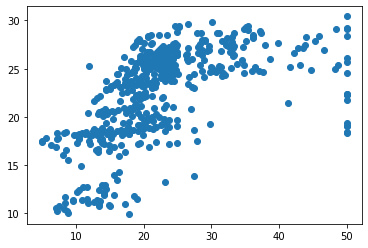

In [11]:
# comparing, y and y_hat
plt.scatter(y, modelo(x_norm).numpy())